## Notebook for Inference

In [2]:
%load_ext lab_black

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tensorflow import keras
from PIL import Image

In [4]:
PATH_TO_MODEL_USED_FOR_INFERENCE = "inception_20_epochs.h5"
model = keras.models.load_model(PATH_TO_MODEL_USED_FOR_INFERENCE)

In [5]:
PATH_TO_IMAGE = "mabel.jpg"

In [6]:
DOG_BREED_LIST = os.listdir("dog_breed_images/dog_breeds/training/")
DOG_BREED_LIST.sort()

In [7]:
def plot_dog(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()

In [8]:
def _prepare_image(image_path):
    """ Given a file path for an image, prepare image for model """
    image = np.array(Image.open(image_path).resize((150, 150), Image.NEAREST)) / 255.0
    return image.reshape(1, 150, 150, 3)

In [9]:
def predict_breed(image_path):
    prepared_image = _prepare_image(image_path)
    predictied_breed_value = model.predict(prepared_image).argmax(axis=-1)[0]
    return DOG_BREED_LIST[predictied_breed_value]

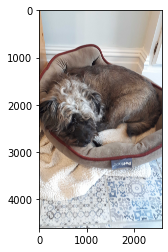

In [10]:
plot_dog(PATH_TO_IMAGE)

In [11]:
predict_breed(PATH_TO_IMAGE)

'bull_mastiff'

### Scoring the test data

In [42]:
results = {}
counter = 1
for im in os.listdir("dog_breed_images/test"):
    if len(im) == 36:
        prepared_image = _prepare_image(f"dog_breed_images/test/{im}")
        predictied_breed_value = model.predict(prepared_image)[0]
        results[im[:-4]] = predictied_breed_value
        counter += 1
        if counter % 1000 == 0:
            print(counter)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [55]:
test_df = pd.DataFrame.from_dict(results, orient="index", columns=DOG_BREED_LIST)
test_df.index.name = "id"
test_df_formatted = test_df.reset_index()

In [57]:
test_df_formatted.to_csv("test_data_scored.csv", index=False)

Scores a muli-class loss of 4.45746 on test dataset.